In [1]:


import pandas as pd
import numpy as np
from collections import namedtuple
import tensorflow as tf

from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import roc_curve, auc, classification_report
from clean_data import clean_description as clean_des

ImportError: No module named 'tensorflow'

In [59]:
sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [64]:

df = pd.read_csv('../data/set2.csv').iloc[:,1:9]
print(df.columns)
df2 = pd.read_csv('../data/set3.csv').iloc[:,1:9]
print(df2.columns)
df=df.append(df2, ignore_index=True)

print(df.shape)

/home/sloth/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'book_title', 'authors', 'cover', 'pub_year', 'src', 'genre',
       'description'],
      dtype='object')
Index(['id', 'book_title', 'authors', 'cover', 'pub_year', 'src', 'genre',
       'description'],
      dtype='object')
(45737, 8)


In [77]:
df['description']=(df['description'].apply(clean_des))
df = df[df.description!=""]
df = df[df.description!=np.nan]
print("ok")

ok


shit
AxesSubplot(0.125,0.125;0.775x0.755)


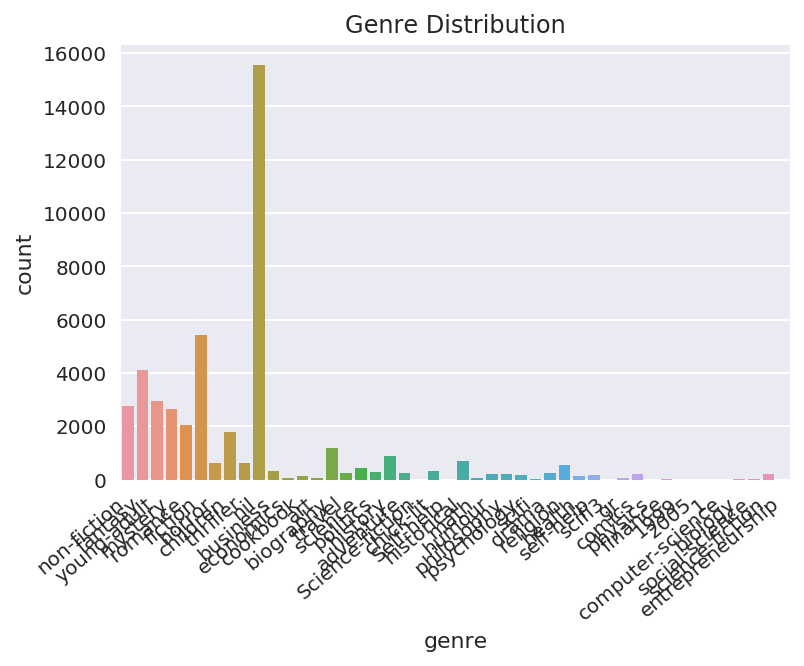

In [16]:

print("shit")
ax = plt.axes()
print(ax)
sns.countplot(df.genre,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Genre Distribution')
plt.show()




In [17]:


wordcloud2 = WordCloud().generate(' '.join(df['description']))
print("ok")

ok


(-0.5, 399.5, 199.5, -0.5)

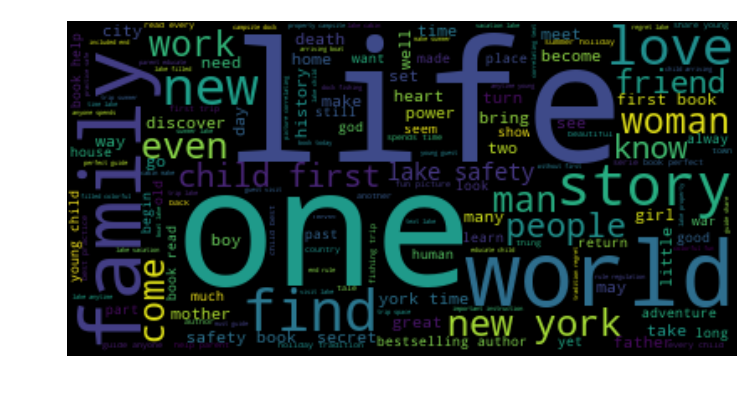

In [19]:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

39268
0
Counter({91: 1746, 90: 977, 89: 965, 92: 963, 86: 911, 88: 892, 87: 883, 96: 880, 93: 771, 85: 728, 94: 723, 84: 695, 83: 612, 95: 577, 82: 562, 81: 513, 18: 510, 64: 452, 80: 417, 97: 406, 79: 404, 78: 402, 26: 393, 76: 367, 41: 361, 98: 359, 77: 356, 44: 349, 28: 342, 70: 341, 46: 335, 74: 335, 27: 332, 72: 332, 57: 331, 24: 330, 29: 329, 39: 328, 73: 328, 32: 327, 62: 327, 25: 323, 49: 322, 48: 320, 51: 320, 30: 319, 99: 319, 71: 318, 55: 315, 47: 315, 65: 314, 43: 314, 58: 313, 63: 313, 69: 312, 23: 312, 75: 310, 31: 310, 67: 308, 37: 306, 40: 304, 33: 301, 60: 300, 66: 300, 50: 298, 20: 296, 42: 294, 56: 293, 45: 293, 52: 291, 19: 289, 14: 287, 38: 286, 68: 285, 59: 283, 22: 282, 53: 281, 12: 280, 21: 279, 13: 278, 36: 277, 16: 276, 34: 275, 15: 274, 54: 272, 17: 264, 35: 259, 61: 255, 11: 242, 9: 238, 10: 229, 8: 228, 100: 194, 7: 186, 6: 178, 101: 159, 5: 125, 102: 107, 4: 79, 103: 70, 1: 65, 104: 57, 3: 43, 105: 42, 2: 38, 106: 37, 107: 19, 147: 17, 151: 17, 135: 16, 13

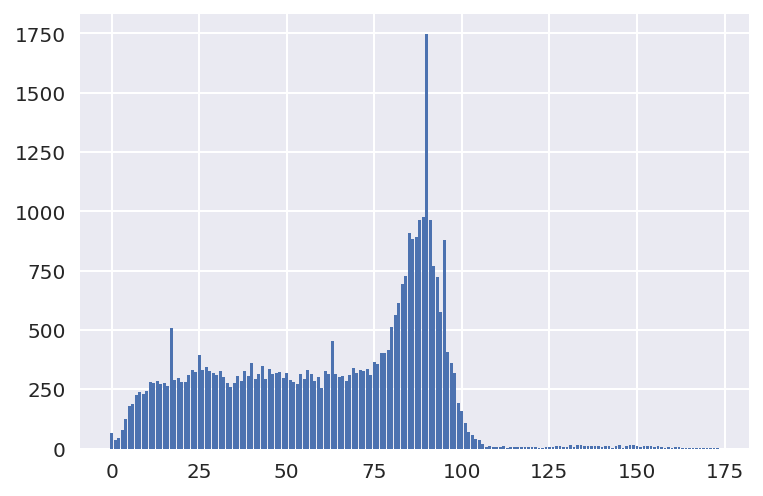

In [96]:
def reviews_to_integers(reviews):
    count=0
    reviews_to_int = []
    for i in range(len(reviews)):
        #to_int = [vocabulary_to_int[word] for word in reviews[i].split()]
        to_int = len(reviews[i].split())
        reviews_to_int.append(to_int)
        if to_int == 0:
            count+=1
    print(count)
    return reviews_to_int

print(len(df['description'].tolist()))
reviews_to_int = reviews_to_integers(df['description'].tolist())

from operator import itemgetter
import collections
counter=collections.Counter(reviews_to_int)
print(counter)

x = []
s=sorted(counter.items(), key=itemgetter(0))
print(s)
for key in s:

    x.append(key[1])
inds=range(len(x))
# Create the histogram 
fig,ax = plt.subplots()
rects = ax.bar(inds, x)
